In [1]:
## imports

import numpy as np
import pandas as pd

import statsmodels.formula.api as sm

# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import os
root = os.path.expanduser('~')

company_index='5'
company_name='Amazon'
img_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/img/companies/'+f'{company_index}_{company_name}'
img_flag = False

if not os.path.exists(img_path):
    os.makedirs(img_path)

In [2]:
def merge_data(company_list=[5]):
    df_ = pd.DataFrame()
    df_company_list = pd.read_csv( root + '/Desktop/workspace/indeed/Job-Satisfaction/data/scraper_data/review_site.csv')
    for company_index in company_list:
        company_name = df_company_list.iloc[company_index - 1]['Company_Name']
        data_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/data/companies/'+\
                    f'{company_index}_{company_name}/{company_name}.csv'
        df_ = pd.concat([df_, pd.read_csv(data_path)]).reset_index(drop=True)
    return df_

# df = merge_data(company_list=[5, 6])
# df = merge_data(company_list=[1, 2, 3, 4, 5])
df = merge_data(company_list=range(1, 51))





/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
# filter only needed columns
ind_vars = ['Work_Life', 'Benefits', 'Job_Advancement', 'Management', 'Culture']
col_to_take = ['Rating_Number']
col_to_take.extend(ind_vars)
df_rating = df[col_to_take]
df_rating.dropna(inplace=True)
df_rating = df_rating[(df_rating[ind_vars] != 0).all(axis=1)]
df_rating.head()
df_rating.shape

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(613024, 6)

In [6]:
df_rating.to_csv('~/Desktop/data/lr_all.csv')

In [5]:
result = sm.ols(formula="Rating_Number ~ Work_Life + Benefits + Job_Advancement + Management + Culture", 
                data=df_rating).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Rating_Number   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 3.698e+05
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:20:09   Log-Likelihood:            -5.4883e+05
No. Observations:              613024   AIC:                         1.098e+06
Df Residuals:                  613018   BIC:                         1.098e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5731      0.003    2

In [6]:
display(result.params)

Intercept          0.573140
Work_Life          0.240355
Benefits           0.135657
Job_Advancement    0.097617
Management         0.171449
Culture            0.257810
dtype: float64

In [7]:
result.tvalues

Intercept          227.830687
Work_Life          268.622260
Benefits           166.609901
Job_Advancement    106.040968
Management         179.551558
Culture            252.392143
dtype: float64

In [8]:
result.pvalues[2]

0.0

In [9]:
result.rsquared

0.7510334192004333

In [10]:
df_results = pd.DataFrame(columns=['Dimension', 'Coefficient', 'T-Value', 'P-Value', 'R-Squared'])
index = 0
for var in ind_vars:
    result = sm.ols(formula=f"Rating_Number ~ {var}", 
                data=df_rating).fit()
    df_results.loc[index] = [var, result.params[1], result.tvalues[1], result.pvalues[1], result.rsquared]
    index += 1
df_results.head()

,Dimension,Coefficient,T-Value,P-Value,R-Squared
0,Work_Life,0.693664,896.871072,0.0,0.567502
1,Benefits,0.605143,676.970914,0.0,0.427784
2,Job_Advancement,0.631609,809.252197,0.0,0.516510
3,Management,0.654686,920.830764,0.0,0.580395
4,Culture,0.712319,1013.585761,0.0,0.626292


<function matplotlib.pyplot.show(*args, **kw)>

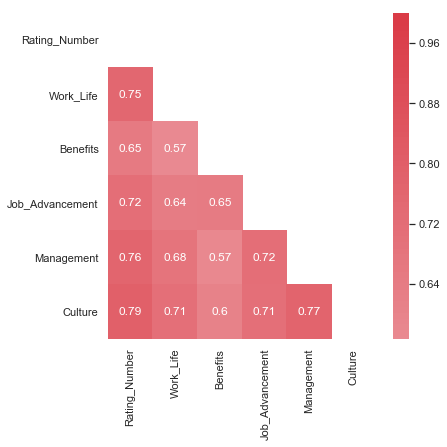

In [20]:
import seaborn as sns

# sns.set(style="white")

# Compute the correlation matrix
corr = df_rating.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0.0)
plt.show